In [2]:
# load dataset
import os
import shutil
import kagglehub
import zipfile

from google.colab import drive

# Mount google drive to /content/drive
drive.mount("/content/drive")

zip_path = "/content/drive/MyDrive/archive.zip"

path_to_plants = "/content/archive"

# all data (including validation set but excluding test set)
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(path_to_plants)

# test set folder (this is separate from the archive.zip folder)
zip_path = "/content/drive/MyDrive/test2.zip"
path_to_test = "/content/test2"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("/content/test2")

os.listdir(path_to_plants)
os.listdir(path_to_test)

Mounted at /content/drive


['test2']

In [3]:
import tensorflow as tf
import numpy as np

SIZE = 224

# load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_to_test + "/test2",  # test data directory
    labels="inferred",
    label_mode="categorical",
    image_size=(SIZE, SIZE),
)

# load the training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_to_plants + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels="inferred",
    label_mode="categorical",
    image_size=(SIZE, SIZE),
)

# load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_to_plants + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",  # validation data directory
    labels="inferred",
    label_mode="categorical",
    image_size=(SIZE, SIZE),
)

# comparing the labels of the test set vs the train set to ensure they match
print(test_ds.class_names)
train_ds.class_names

Found 31 files belonging to 38 classes.
Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blig

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

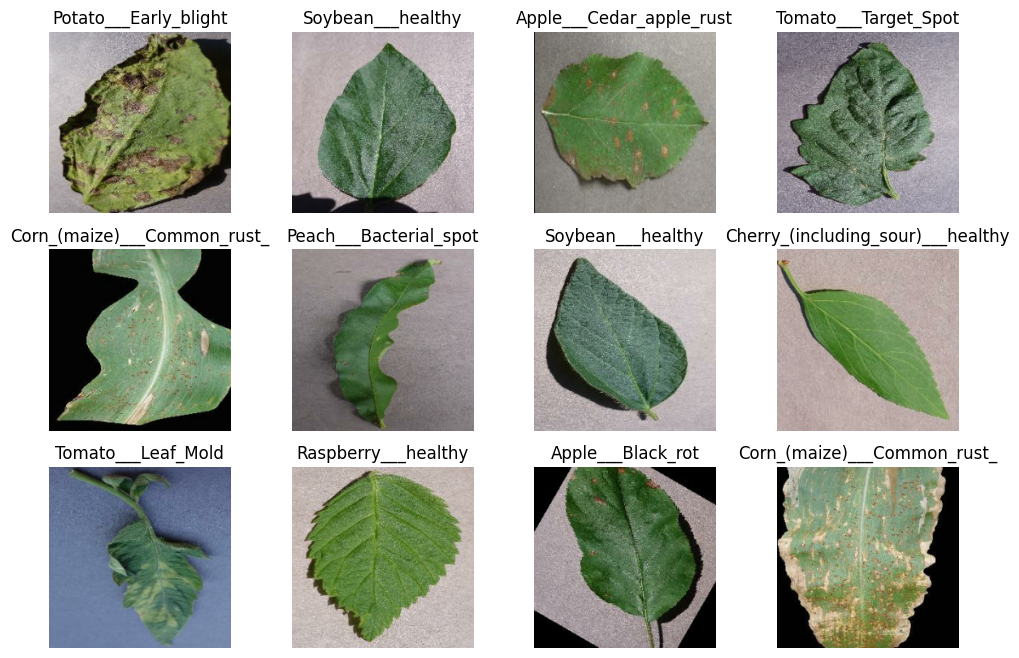

Number of classes: 38


TensorShape([32, 224, 224, 3])

In [4]:
import matplotlib.pyplot as plt

# looking at random samples of the plant images

images, labels = next(iter(train_ds.take(1)))

plt.figure(figsize=(12, 8))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[np.argmax(labels[i])])
    plt.axis("off")
plt.show()

num_classes = len(train_ds.class_names)
print(f"Number of classes: {num_classes}")
images.shape

In [5]:
# model creation

model = tf.keras.Sequential([
    tf.keras.layers.Input((SIZE, SIZE, 3)),
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(38, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 220, 220, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 108, 108, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 106, 106, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 51, 51, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 49, 49, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    15,860,224 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 16,466,758 (62.82 MB)

 Trainable params: 16,464,326 (62.81 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [6]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# train the model
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 349s 149ms/step - accuracy: 0.6235 - loss: 1.3618 - val_accuracy: 0.7810 - val_loss: 0.8119
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 313s 142ms/step - accuracy: 0.8913 - loss: 0.3433 - val_accuracy: 0.9019 - val_loss: 0.3018
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 320s 141ms/step - accuracy: 0.9315 - loss: 0.2103 - val_accuracy: 0.9446 - val_loss: 0.1746
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 323s 142ms/step - accuracy: 0.9534 - loss: 0.1418 - val_accuracy: 0.7937 - val_loss: 0.8603
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 311s 141ms/step - accuracy: 0.9640 - loss: 0.1077 - val_accuracy: 0.8678 - val_loss: 0.5252


In [11]:
# save the model
model.save("plant_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7742 - loss: 0.8785
550/550 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8671 - loss: 0.5423


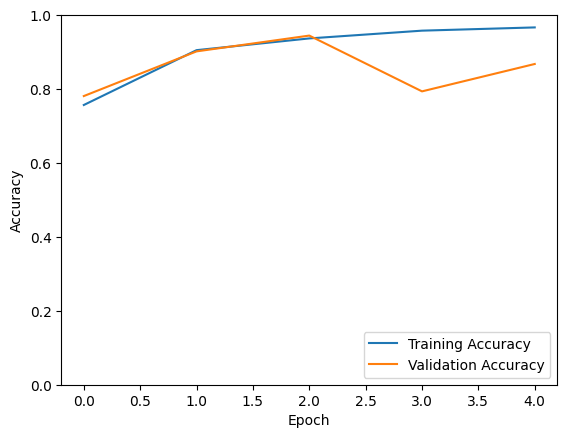

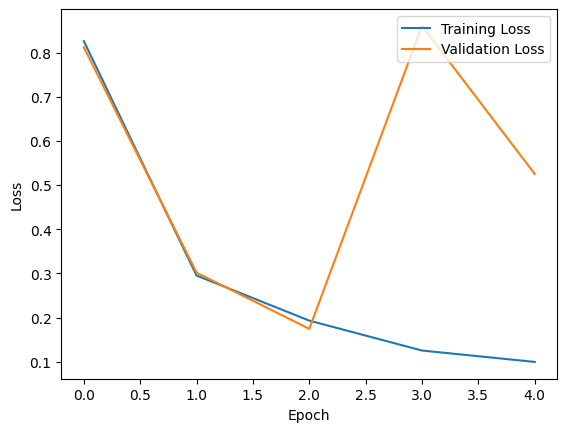

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
Image 0: True = Corn_(maize)___Common_rust_, Predicted = Corn_(maize)___Common_rust_
Image 1: True = Tomato___Early_blight, Predicted = Tomato___Septoria_leaf_spot
Image 2: True = Tomato___Tomato_Yellow_Leaf_Curl_Virus, Predicted = Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image 3: True = Potato___healthy, Predicted = Potato___healthy
Image 4: True = Tomato___healthy, Predicted = Orange___Haunglongbing_(Citrus_greening)
Image 5: True = Tomato___Early_blight, Predicted = Tomato___Early_blight
Image 6: True = Tomato___Tomato_Yellow_Leaf_Curl_Virus, Predicted = Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image 7: True = Tomato___Tomato_Yellow_Leaf_Curl_Virus, Predicted = Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image 8: True = Corn_(maize)___Common_rust_, Predicted = Corn_(maize)___Common_rust_
Image 9: True = Tomato___healthy, Predicted = Tomato___healthy
Image 10: True = Apple___Apple_scab, Predicted = Apple___Apple_scab
Image 11: True = Tomato___Tomato_Yell

In [12]:
# model performance/evaluation

# load the model
model = tf.keras.models.load_model("plant_model.keras")

test_loss, test_acc = model.evaluate(test_ds)
val_loss, val_acc = model.evaluate(val_ds)

# plot accuracy for both training and validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# plot loss for both training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

for images, labels in test_ds.take(1):
    preds = model.predict(images)

    # predicted labels
    predicted_class_indices = np.argmax(preds, axis=1)

    # true labels
    true_class_indices = np.argmax(labels.numpy(), axis=1)  # labels are tensors so use .numpy()

    # class names
    class_names = test_ds.class_names

    # map predicted to names
    predicted_labels = [class_names[i] for i in predicted_class_indices]
    true_labels = [class_names[i] for i in true_class_indices]

    # print side by side
    for i in range(len(predicted_labels)):
        print(f"Image {i}: True = {true_labels[i]}, Predicted = {predicted_labels[i]}")